In [122]:
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from PIL import Image
import requests
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
auth_manager = SpotifyClientCredentials('424af1dc12124b348f3512f327311c06', '4f653f97baa9452984c3a2dc2d202024')
sp = spotipy.Spotify(auth_manager=auth_manager)

Embrace Our Gift
Here Comes the Pain
Pestbringer
Dein Licht
Aggression Incarnate
Countdown to Destruction
Nightmare
Noise Monsters
Lobotomy
The Holy Inquisition
Tote Musikanten


In [161]:
albums = pd.read_excel('data/my_albums.ods')
albums.head()

,Artist,Title,Label,Rating,Released,release_id,CollectionFolder,Date Added
0,Wu-Tang Clan,The Saga Continues,"36 Chambers, eOne, SPV",3,2017,11042358,lyric-heavy,2018-01-05 01:01:24
1,Bon Iver,"Bon Iver, Bon Iver","4AD, Jagjaguwar",5,2011,2942482,instrumental-heavy,2018-01-05 00:47:43
2,Eminem,The Eminem Show,Aftermath Entertainment,4,2002,1734171,lyric-heavy,2018-01-05 00:51:37
3,alt-J,An Awesome Wave,Atlantic,4,2012,3932272,instrumental-heavy,2018-01-05 00:44:58
4,Phoenix,Ti Amo,"Atlantic, Glassnote, Loyaut",3,2017,10439069,instrumental-heavy,2018-01-05 00:57:54
...,...,...,...,...,...,...,...,...
75,Red Hot Chili Peppers,By The Way,Warner Bros. Records,3,2002,2382816,instrumental-heavy,2018-10-11 00:37:29
76,Mac Miller,Swimming,"Warner Bros. Records, REMember Music",4,2018,12681974,lyric-heavy,2019-03-23 01:09:04
77,Vampire Weekend,Contra,XL Recordings,3,2010,2888478,instrumental-heavy,2018-12-26 21:37:06
78,Ratatat,Classics,XL Recordings,4,2006,834957,instrumental-heavy,2018-01-05 00:58:59


In [106]:
df_song = pd.DataFrame(song_data)
df_song

,name,album,year,track_number,tracks_on_album,explicit,duration_ms,popularity,artist,danceability,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,album_image_url
0,Ghostwriter,Deadringer: Deluxe,2002,6,18,0,317933,63,RJD2,0.747,...,0.0964,0.594,93.804,audio_features,5Nn2Dj7OQsGL6pgQ9iIzPp,spotify:track:5Nn2Dj7OQsGL6pgQ9iIzPp,https://api.spotify.com/v1/tracks/5Nn2Dj7OQsGL...,https://api.spotify.com/v1/audio-analysis/5Nn2...,4,https://i.scdn.co/image/ab67616d0000b273482be3...


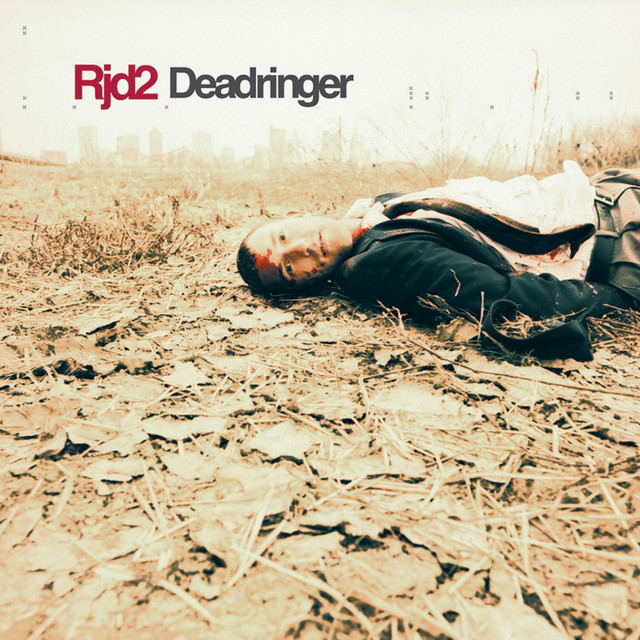

In [125]:
Image.open(requests.get(df_song['album_image_url'][0], stream=True).raw)

In [162]:
for idx, name in enumerate(albums['Title']):
    print(idx, name)

0 The Saga Continues
1 Bon Iver, Bon Iver
2 The Eminem Show
3 An Awesome Wave
4 Ti Amo
5 Rap Album Two
6 Thank You For Today
7 1989
8 None Shall Pass
9 Teenage Dream
10 Greatest Hits 1974-78
11 The Human Condition
12 The Definition
13 Glory Sound Prep
14 Continuum
15 Bob Dylan's Greatest Hits Volume II
16 Illmatic
17 Flower Boy
18 Animals
19 Ye
20 Good News For People Who Love Bad News
21 Boston
22 The Pick Of Destiny
23 Chronicle - The 20 Greatest Hits
24 Run The Jewels
25 XXX
26 Some Nights
27 We Don't Need To Whisper
28 Cheshire Cat
29 Camp
30 The Dark Side Of The Moon
31 How To Be A Human Being
32 Currents
33 Leftoverture
34 Aquemini
35 Stankonia
36 Runaround Sue
37 Run The Jewels 2
38 Blink-182
39 Enema Of The State
40 Legends Never Die
41 Professional Rapper
42 I-Empire
43 10 Day
44 Acid Rap
45 Wolf
46 The Now Now
47 Humanz
48 Demon Days
49 Plastic Beach
50 Gorillaz
51 Melophobia
52 Felt 2: A Tribute To Lisa Bonet (10 Year Anniversary Edition)
53 Overcast! - Twenty Year Anniversa

In [169]:
album = albums['Title'][17]
year = albums['Released'][17]

d = defaultdict(list)

# find album by name
results = sp.search(q = "album:" + album, type = "album")

# get the first album uri
album_id = results['albums']['items'][0]['uri']

# Create and save album uri's to list
#album_uri.append(album_id)

# get album tracks
tracks = sp.album_tracks(album_id)

print(f'Getting songs for {album}' + '\n')
for track in tracks['items']:
    d['name'].append(track['name'])
    d['year'].append(year)
    print(track['name'])

print(f'Done getting songs for {album}' + '\n')

Getting songs for Flower Boy

Foreword (feat. Rex Orange County)
Where This Flower Blooms (feat. Frank Ocean)
Sometimes...
See You Again (feat. Kali Uchis)
Who Dat Boy (feat. A$AP Rocky)
Pothole (feat. Jaden Smith)
Garden Shed (feat. Estelle)
Boredom (feat. Rex Orange County & Anna of the North)
I Ain't Got Time!
911 / Mr. Lonely (feat. Frank Ocean & Steve Lacy)
Droppin' Seeds (feat. Lil' Wayne)
November
Glitter
Enjoy Right Now, Today
Done getting songs for Flower Boy



In [170]:
d

defaultdict(list,
            {'name': ['Foreword (feat. Rex Orange County)',
              'Where This Flower Blooms (feat. Frank Ocean)',
              'Sometimes...',
              'See You Again (feat. Kali Uchis)',
              'Who Dat Boy (feat. A$AP Rocky)',
              'Pothole (feat. Jaden Smith)',
              'Garden Shed (feat. Estelle)',
              'Boredom (feat. Rex Orange County & Anna of the North)',
              "I Ain't Got Time!",
              '911 / Mr. Lonely (feat. Frank Ocean & Steve Lacy)',
              "Droppin' Seeds (feat. Lil' Wayne)",
              'November',
              'Glitter',
              'Enjoy Right Now, Today'],
             'year': [2017,
              2017,
              2017,
              2017,
              2017,
              2017,
              2017,
              2017,
              2017,
              2017,
              2017,
              2017,
              2017,
              2017]})

In [55]:
song_dict = {}
for i in range(len(tracks)):
    song_dict[tracks['items'][i]['name']] = sp.audio_features(tracks['items'][i]['uri'])
    
song_dict

{'Foreword (feat. Rex Orange County)': [{'danceability': 0.734,
   'energy': 0.671,
   'key': 1,
   'loudness': -7.107,
   'mode': 1,
   'speechiness': 0.0315,
   'acousticness': 0.118,
   'instrumentalness': 0.00317,
   'liveness': 0.352,
   'valence': 0.113,
   'tempo': 94.025,
   'type': 'audio_features',
   'id': '33i3xxHB4YSYGYbtJrwwO8',
   'uri': 'spotify:track:33i3xxHB4YSYGYbtJrwwO8',
   'track_href': 'https://api.spotify.com/v1/tracks/33i3xxHB4YSYGYbtJrwwO8',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/33i3xxHB4YSYGYbtJrwwO8',
   'duration_ms': 194080,
   'time_signature': 4}],
 'Where This Flower Blooms (feat. Frank Ocean)': [{'danceability': 0.686,
   'energy': 0.429,
   'key': 8,
   'loudness': -10.402,
   'mode': 0,
   'speechiness': 0.15,
   'acousticness': 0.71,
   'instrumentalness': 3.41e-06,
   'liveness': 0.166,
   'valence': 0.27,
   'tempo': 130.09,
   'type': 'audio_features',
   'id': '6KuXb26rHuRy3ZDse1VRmx',
   'uri': 'spotify:track:6KuXb26rHuR

In [172]:
albums_lst = np.array(['The Saga Continues', 'Bon Iver, Bon Iver', 'The Eminem Show',
       'An Awesome Wave', 'Ti Amo', 'Rap Album Two',
       'Thank You For Today', '1989', 'None Shall Pass', 'Teenage Dream',
       'Greatest Hits 1974-78', 'The Human Condition', 'The Definition',
       'Glory Sound Prep', 'Continuum',
       "Bob Dylan's Greatest Hits Volume II", 'Illmatic',
       'Flower Boy', 'Animals', 'Ye',
       'Good News For People Who Love Bad News', 'Boston',
       'The Pick Of Destiny', 'Chronicle - The 20 Greatest Hits',
       'Run The Jewels', 'XXX', 'Some Nights', "We Don't Need To Whisper",
       'Cheshire Cat', 'Camp', 'The Dark Side Of The Moon',
       'How To Be A Human Being', 'Currents', 'Leftoverture', 'Aquemini',
       'Stankonia', 'Runaround Sue', 'Run The Jewels 2', 'Blink-182',
       'Enema Of The State', 'Legends Never Die', 'Professional Rapper',
       'I-Empire', '10 Day', 'Acid Rap', 'Wolf', 'The Now Now', 'Humanz',
       'Demon Days', 'Plastic Beach', 'Gorillaz', 'Melophobia',
       'Felt 2: A Tribute To Lisa Bonet (10 Year Anniversary Edition)',
       'Overcast! - Twenty Year Anniversary', 'Shadows On The Sun',
       'MM..Food', 'Sad Clown Bad Summer (Sad Clown Bad Dub #9)',
       "You Can't Imagine How Much Fun We're Having", 'Southsiders',
       'The Impossible Kid', 'Pookie Baby', 'Overcast EP', 'Deadringer',
       'My Beautiful Dark Twisted Fantasy', 'The College Dropout',
       'Run The Jewels 3', 'Take Off Your Pants And Jacket',
       'Madvillainy', 'Pure Comedy', 'The Rick And Morty Soundtrack',
       "Who's Next", 'Man On The Moon: The End Of Day',
       'Man On The Moon II: The Legend Of Mr. Rager',
       'You Gotta Go There To Come Back', 'Homesick', 'By The Way',
       'Swimming', 'Contra', 'Classics', 'Modern Vampires Of The City'],
      dtype=object)

In [181]:
album_uri = []
track_uri = []
 
for album in albums_lst:
    # find album by name
    results = sp.search(q = "album:" + album, type = "album")
    #print(f'results: {results}')
    
    # get the first album uri
    album_id = results['albums']['items'][0]['uri']
    #print(f'album_id: {album_id}')
    
    # Create and save album uri's to list
    album_uri.append(album_id)
    
    # get album tracks
    tracks = sp.album_tracks(album_id)
    #print(f'tracks: {tracks.keys()}')
    
    # Create song dictionary to hold song name as key and values are from sp.audio_features
    song_dict = {}
    
    print(f'Getting songs for {album}' + '\n')
    for i in range(len(tracks)):
        song_dict[tracks['items'][i]['name']] = sp.audio_features(tracks['items'][i]['uri'])
        track_uri.append(tracks['items'][i]['uri'])
        print(tracks['items'][i]['name'])
        
    print(f'Done getting songs for {album}' + '\n')

Getting songs for The Saga Continues

The Saga Continues
Bad Boy for Life
Toe Game - Interlude
That's Crazy (feat. Black Rob & G-Dep)
Let's Get It (feat. G. Dep & Black Rob)
Shiny Suit Man
Diddy (feat. The Neptunes)
Done getting songs for The Saga Continues

Getting songs for Bon Iver, Bon Iver

Perth
Minnesota, WI
Holocene
Towers
Michicant
Hinnom, TX
Wash.
Done getting songs for Bon Iver, Bon Iver

Getting songs for The Eminem Show

Curtains Up - Skit
White America
Business
Cleanin' Out My Closet
Square Dance
The Kiss - Skit
Soldier
Done getting songs for The Eminem Show

Getting songs for An Awesome Wave

Intro
Interlude 1
Tessellate
Breezeblocks
Interlude 2
Something Good
Dissolve Me
Done getting songs for An Awesome Wave

Getting songs for Ti Amo

Si Lo Hubiera Sabido
Y Tú Con Él
Ayúdame
Sabor Al Caldo
Enséñame
Enamorado De Tus Ojos
Siempre Te Amaré
Done getting songs for Ti Amo

Getting songs for Rap Album Two

TED Talk
LIVE from the Fuck You
Human Condition
Out of Sight
The Singl

IndexError: list index out of range

In [30]:
track_uri

['spotify:track:7uPQteO7MmOr4BPvuEKvtP',
 'spotify:track:2eOuL8KesslTLQERQPu11D',
 'spotify:track:2pXOkA44tsXfJzNSLQZbGU',
 'spotify:track:0dNuBouoFqp4tlBZrRyU3x',
 'spotify:track:0sWGn9Yvbu6ITFFwFGroQ7',
 'spotify:track:1FoQJn2l0FMiRNIMd3o6fr',
 'spotify:track:3829CDK1kzOgjRU3nNXqFQ',
 'spotify:track:28bqjFKKPdnoeIHDSJ4K5d',
 'spotify:track:4T5s0k44jYaQp9yEFCz2jG',
 'spotify:track:0THWpuzX70RqMylhoG9W8z',
 'spotify:track:7bRC2HK2VYjnOukV5D9Zk6',
 'spotify:track:44TPLP2chECKrO0rHxh095',
 'spotify:track:7xBq8afWKCFstXdrWr8n7U',
 'spotify:track:4aJ14KZ4GUB222hgtksJFh',
 'spotify:track:4YFj4Dg0Nea7tfzTuRjWi8',
 'spotify:track:4CxXUxi9rkFrkm7r9ygoYA',
 'spotify:track:5jfBwN7DeuiqPdlvCIYUJ0',
 'spotify:track:6eSy6PqtCMSS1zNLCJJn4z',
 'spotify:track:2IaAWewRu4JrlM2UCKROuZ',
 'spotify:track:40cuWBGIVzM5InQSpj0Sd6',
 'spotify:track:0LF7bnrdjA4IUs3l6gA5f5',
 'spotify:track:3P1rg8KRfiNAzTA1Lcsb2k',
 'spotify:track:6MoXXvodEbr8ShYXc8dk3k',
 'spotify:track:6etKbjteLPG9abNPLZH2BM',
 'spotify:track:

In [31]:
album_uri

['spotify:album:28BrFxsnBMjN689hOuf1jv',
 'spotify:album:1JlvIsP2f6ckoa62aN7kLn',
 'spotify:album:2cWBwpqMsDJC1ZUwz813lo',
 'spotify:album:6k3vC8nep1BfqAIJ81L6OL',
 'spotify:album:6vKTeSlxFAq1vh3Ajz35CM',
 'spotify:album:04a2Vx232ZWNVcoGQEyKGD',
 'spotify:album:6agCM9GJcebduMddgFmgsO',
 'spotify:album:2QJmrSgbdM35R67eoGQo4j',
 'spotify:album:7mB5yhTfOUdtLdjRAsPY4t',
 'spotify:album:5BvgP623rtvlc0HDcpzquz',
 'spotify:album:5hLazW5a3Ysgy3dncwGgUn',
 'spotify:album:2jJReDZqTuAxr4R0ItimZc',
 'spotify:album:2ge7Lk4Sl7hHs4AYxqDbf1',
 'spotify:album:59YYObx9wFEFG5zVdlfwvf',
 'spotify:album:1Xsprdt1q9rOzTic7b9zYM',
 'spotify:album:0gpxfGPaJ45BCUeLVRwnKV',
 'spotify:album:3kEtdS2pH6hKcMU9Wioob1',
 'spotify:album:2nkto6YNI4rUYTLqEwWJ3o',
 'spotify:album:0Xwkx2TLFwRcoK0OWQ0Msa',
 'spotify:album:7D2NdGvBHIavgLhmcwhluK',
 'spotify:album:0TGTGuc2vXv6ZECoAf52N0',
 'spotify:album:2QLp07RO6anZHmtcKTEvSC',
 'spotify:album:3tYcwViLCWsT1ssa5p7V7A']